<a href="https://www.kaggle.com/code/chandruuk/titanic-machine-learning?scriptVersionId=106879195" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Importing the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
df_train=pd.read_csv("/kaggle/input/titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df=df_train.append(df_test)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.shape

(1309, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


* column 'PassengerId' and 'name'is have uniques values so need to drop
* coumn sex and Embarked has to encode into int
* Ticket and cabin have mixed values 

## Handling Categorical Features

In [12]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
df['Sex']=df['Sex'].map({'female':0,'male':1})

In [14]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df['Embarked']=df['Embarked'].map({'S':1,'C':2,'Q':3})

 nan values handle in data missing and handling section

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


In [17]:
df['Sex']=df['Sex'].astype(int)

Emberked have null values so, we convert after handling null data 

In [18]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [19]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
df=df.drop(labels=['PassengerId', 'Name','Cabin','Ticket'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 92.0 KB


## Handling Missing Values

In [22]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [23]:
df['Survived']=df['Survived'].fillna(df['Survived'].mode()[0])

In [24]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 92.0 KB


In [27]:
df.shape

(1309, 8)

## Data visualisation

<AxesSubplot:title={'center':'Males and Females who survived'}, xlabel='Sex', ylabel='Age'>

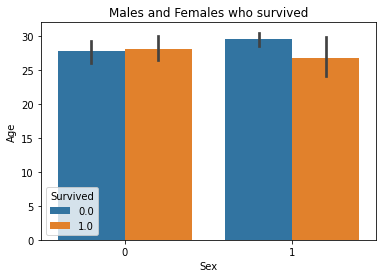

In [28]:
plt.title("Males and Females who survived")
sns.barplot(x=df['Sex'],y=df['Age'],hue=df['Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

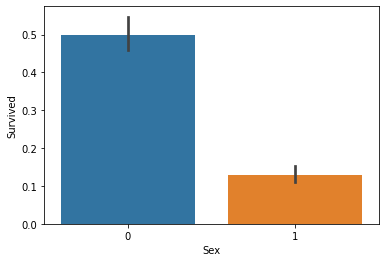

In [29]:
sns.barplot(data=df, x="Sex", y="Survived")

In [30]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,1.0
1,1.0,1,0,38.0,1,0,71.2833,2.0
2,1.0,3,0,26.0,0,0,7.9250,1.0
3,1.0,1,0,35.0,1,0,53.1000,1.0
4,0.0,3,1,35.0,0,0,8.0500,1.0


## Splitting the Data

In [31]:
X=df.drop('Survived',axis=1)
y=df["Survived"]

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.319,random_state=1)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test_x=sc.transform(x_test)

In [34]:
print(X.shape)
print(y.shape)
print(x_train.shape)
print(x_test.shape)

(1309, 7)
(1309,)
(891, 7)
(418, 7)


## Preidiction

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1,max_iter=1000)
model = lr.fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 70.57416267942584 



In [36]:
gvc =  GradientBoostingClassifier()
gvc.fit(x_train,y_train)
gvc_predicted = gvc.predict(x_test)
gvc_acc_score = accuracy_score(y_test, gvc_predicted)
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')


Accuracy of Gradient Boosting Classifier: 30.14354066985646 



In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
model = knn.fit(x_train,y_train)
knn_predict = knn.predict(x_test)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')


Accuracy of k-NN Classification: 58.3732057416268 



In [38]:
rf = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
rf.fit(x_train,y_train)
rf_predicted = rf.predict(x_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')

Accuracy of Random Forest: 70.57416267942584 



In [39]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(x_train,y_train)
dt_predicted = dt.predict(x_test)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')

Accuracy of DecisionTreeClassifier: 36.60287081339713 



In [40]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.shape

(418, 11)

In [41]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [43]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test_data.shape

(418, 11)

In [45]:
test_data=test_data.drop(labels=['Cabin'], axis=1)

In [46]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": lr_predict
    })
submission.to_csv('submission.csv', index=False)